## 1. Explore data

In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy.ma.core import count

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

dfs = []
for file in all_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)

# unique participant_ids count
def unique_participant_ids(dataframe):
    unique_participants = dataframe['PARTICIPANT_ID'].nunique()
    print(f"Count of unique PARTICIPANT_IDs: {unique_participants}")

# print all ids
def print_pids(folder):
    unique_ids = set()

    for file in folder:
        with open(file, 'r', encoding='utf-8') as f:
            reader = csv.reader(f)
            header = next(reader)
            try:
                pid_idx = header.index('PARTICIPANT_ID')
            except ValueError:
                continue  # Skip files without the column
            for row in reader:
                if len(row) > pid_idx:
                    participant_id = row[pid_idx]
                    unique_ids.add(participant_id)

    print("Unique PARTICIPANT_IDs:")
    for pid in unique_ids:
        print(pid)
    print(f"Total unique PARTICIPANT_IDs: {len(unique_ids)}")

#submission per participant id
def submissions_per_pid(dataframe):
    files_per_participant = dataframe.groupby('PARTICIPANT_ID')['SOURCE_FILE'].nunique()
    files_per_participant.plot(kind='bar')
    plt.title('Data per PARTICIPANT_ID')
    plt.xlabel('PARTICIPANT_ID')
    plt.ylabel('Data')
    plt.show()

# usage time
def usage_time(df):
    return df['RELEASE_TIME'].max() - df['PRESS_TIME'].min()

# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)

# frequency
def show_frequency(dataframe):
    plt.figure()
    dataframe['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
    plt.title('Distribution of FREQUENCY')
    plt.xlabel('FREQUENCY')
    plt.ylabel('Count')
    plt.show()

# count columns
def count_rows(folder):
    df_rows_count_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current['ROW_COUNT'] = len(df_current)
        df_rows_count_current.append(df_current)
    df_rows_count = pd.concat(df_rows_count_current, ignore_index=True)
    print(df_rows_count)

    # calculate time passing for each file

def calculate_time_per_file(folder):
    df_calculate_time_current = []
    for file in folder:
        df_current = pd.read_csv(file)
        df_current['TIME_PASSING'] = df_current['RELEASE_TIME'] - df_current['PRESS_TIME']
        df_calculate_time_current.append(df_current)
    df_calculate_time = pd.concat(df_calculate_time_current, ignore_index=True)
    print(df_calculate_time)

# 5. length of rows per file
def prompt_length_per_file(df):
    return df['PROMPT'].astype(str).apply(len).sum()

# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

In [2]:
# print(unique_participant_ids(data))
# print(print_pids(all_files))
# print(submissions_per_pid(data))
#
# usage_times = data.groupby('PARTICIPANT_ID').apply(usage_time)
# print("total time passed PARTICIPANT_ID (ms):")
# print(usage_times)
#
# print(show_frequency(data))
#
# prompt_lengths = data.groupby('SOURCE_FILE').apply(prompt_length_per_file)
# print("Length of PROMPT Columns per file:")
# print(prompt_lengths)

### Failure given data having invalid characters -> clean data

In [3]:
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def print_invalid_participant_ids(file_paths):
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    print(f"Invalid PARTICIPANT_ID in file {path}: {pid}")
        except Exception as e:
            print(f"Error reading {path}: {e}")

def print_unique_valid_participant_ids(file_paths):
    valid_ids = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if is_valid_participant_id(pid):
                    valid_ids.add(pid)
        except Exception as e:
            print(f"Error reading {path}: {e}")
    print("Unique valid PARTICIPANT_IDs:")
    for pid in valid_ids:
        print(pid)
    print(f"Total valid PARTICIPANT_IDs: {len(valid_ids)}")

folder = 'data/keystrokes'
all_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]

print_invalid_participant_ids(all_files)
print_unique_valid_participant_ids(all_files)

Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091734.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091841.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827091947.csv: name 're' is not defined
Error reading data/keystrokes\experiment_566bdeb3beaf21001240085a_20250827092128.csv: name 're' is not defined
E

In [4]:
import re
import shutil
import os

def is_valid_participant_id(pid):
    # Checks if the id is 24 chars, only lowercase letters and digits
    return bool(re.fullmatch(r'[a-z0-9]{24}', str(pid)))

def get_files_with_invalid_participant_ids(file_paths):
    invalid_files = set()
    for path in file_paths:
        try:
            df = pd.read_csv(path)
            for pid in df.get('PARTICIPANT_ID', []):
                if not is_valid_participant_id(pid):
                    invalid_files.add(path)
                    break
        except Exception as e:
            print(f"Error reading {path}: {e}")
    return invalid_files

# Example usage:
invalid_files = get_files_with_invalid_participant_ids(all_files)
os.makedirs('data/valid_keystrokes', exist_ok=True)
for file in all_files:
    if file not in invalid_files:
        shutil.copy(file, os.path.join('data/valid_keystrokes', os.path.basename(file)))

In [5]:
import csv

folder = 'data/valid_keystrokes'
all_valid_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_valid_files:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_cleaned = pd.concat(dfs, ignore_index=True)

### with cleaned id overview

Count of unique PARTICIPANT_IDs: 104
None
Unique PARTICIPANT_IDs:
67430c9cce2366e644146584
5ed94af267e7bf10f180c5b0
5faeb56b25a37f01d47d326c
67450bce7a49cb1c784dcc2b
666f76b68b89442817be678a
65c7b42c1c15b1064e26f265
5de90f54a48441037ac21f43
60984a1b0cce76d16c4ca781
66568a94f8713133e461fe9c
615921b85071b9caef6148d8
5f4e12f4bfcaa83ec7f3f5f0
67d80b3db0cac8b1bd982fb2
5bb58e338f3bd70001e5df57
5bf368846edd7200017136c7
65f03cac071873738667ccbb
65a3ec77f674ac3e98f0c6ac
664e413a5f3eb7f99d90e15b
661564c766603e80ca4c3184
65fc95c627592d85499ae358
6140ef8d27499e70e8740918
5d3b0da8a884020001881773
6635344fb4ae723326e3ce04
65fda4aa45ba55e983e2a2d9
6672fea3fe6378e257b6ef25
66321cfc446914f3b199e193
6400e3697879c55c323f34d0
67356f7cf6ff16fe3322a837
663378460f834e9670d1508c
6870acd4d7a2c843c144bfd7
5ea4cebb8944a8495280db42
5f600669b846780f0fe45709
6614435124bf16e7a24f9662
6725c4a8e3ab0787551acf38
60f23a36acf5f6c70e990efd
5dafea4de40355001651fa2f
65a3f4da297bacfcc92dead2
5962a9280b835400010a7617
616f9519f

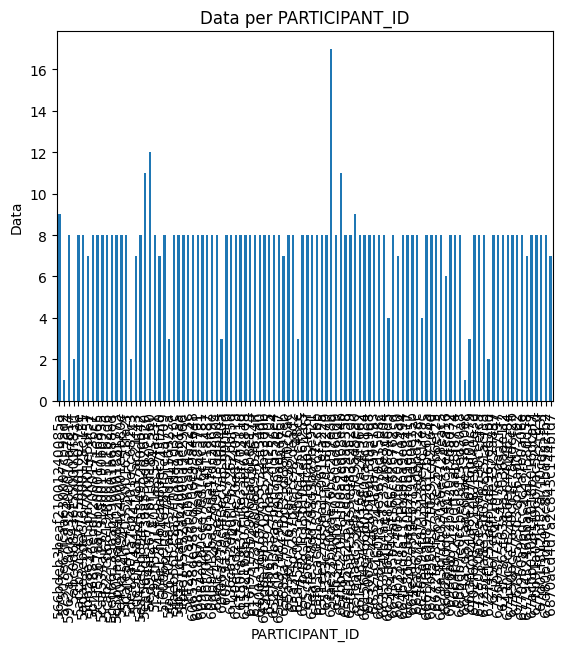

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
5962a9280b835400010a7617     1000373
5abc0d68436f550001ff83ff       77148
5accb373436f5500010037ee     1848518
                              ...   
67acbb030811018b016dcaf7      406600
67bb91a04f5f96b7ac52242d     1772835
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
6870acd4d7a2c843c144bfd7     7504700
Length: 104, dtype: int64


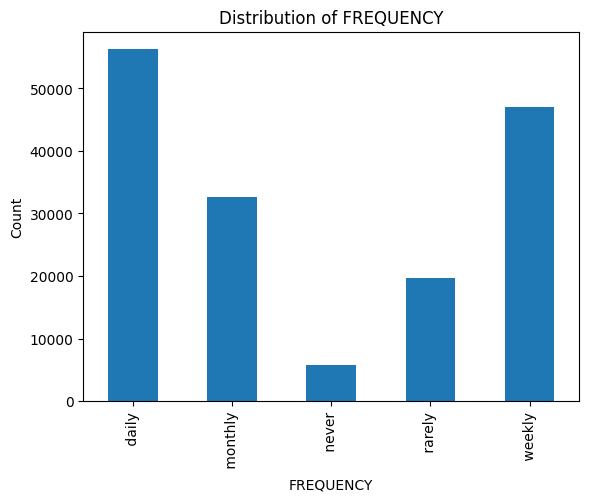

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [6]:
print(unique_participant_ids(data_id_cleaned))
print(print_pids(all_valid_files))
print(submissions_per_pid(data_id_cleaned))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_valid_files))

print(calculate_time_per_file(all_valid_files))

## Folder contains participant ids with more than 8 submissions

In [7]:
import os
import shutil
from collections import Counter
from pathlib import Path
import pandas as pd

def clean_full_submission(folder: str | os.PathLike) -> dict:
    """
    Scan `folder` for CSVs, count how many files each PARTICIPANT_ID appears in
    (counting once per file), and create 'data/full_submissions' containing only
    files whose PARTICIPANT_ID appears in exactly 8 files.

    Returns:
        {
            "counts": Counter({participant_id: num_files, ...}),
            "ids_exactly_8": set([...]),
            "ids_less_than_8": set([...]),
            "ids_more_than_8": set([...]),
            "file_to_id": {Path(...): "participant_id", ...},
            "output_dir": Path("data/full_submissions"),
            "problems": [(Path(...), "message"), ...],
        }
    """
    folder = Path(folder)
    csv_files = sorted(p for p in folder.glob("*.csv") if p.is_file())
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found in: {folder}")

    file_to_id: dict[Path, str] = {}
    problems: list[tuple[Path, str]] = []

    for f in csv_files:
        try:
            df = pd.read_csv(f, low_memory=False)
            if "PARTICIPANT_ID" not in df.columns:
                problems.append((f, "Missing column 'PARTICIPANT_ID'"))
                continue

            s = df["PARTICIPANT_ID"].astype(str).str.strip()
            vals = [v for v in s if v and v.lower() != "nan"]
            if not vals:
                problems.append((f, "No participant ID values"))
                continue

            # Expect a single ID per file; if not, use the mode
            unique_ids = set(vals)
            if len(unique_ids) == 1:
                pid = next(iter(unique_ids))
            else:
                pid = pd.Series(vals).value_counts().idxmax()
                problems.append((f, f"Multiple IDs found, using most frequent: {pid}"))

            file_to_id[f] = str(pid)

        except Exception as e:
            problems.append((f, f"Error reading file: {e!s}"))

    # Count files per participant (each file contributes at most once)
    counts = Counter(file_to_id.values())
    ids_exactly_8 = {pid for pid, c in counts.items() if c == 8}
    ids_less_than_8 = {pid for pid, c in counts.items() if c < 8}
    ids_more_than_8 = {pid for pid, c in counts.items() if c > 8}

    # Create output dir exactly like your working snippet (relative, no leading slash)
    output_dir = Path("data") / "full_submissions"
    os.makedirs(output_dir, exist_ok=True)

    # Optional: clear existing files so the folder reflects the current rule
    for p in output_dir.iterdir():
        if p.is_file():
            p.unlink()

    # Copy only files whose participant has exactly 8 files in total
    selected_files = [f for f, pid in file_to_id.items() if pid in ids_exactly_8]
    for f in selected_files:
        shutil.copy(f, output_dir / f.name)

    # Quick console summary
    print(f"Scanned {len(csv_files)} files in: {folder}")
    print(f">8 files: {sorted(ids_more_than_8)}")
    print(f"<8 files: {sorted(ids_less_than_8)}")
    print(f"=8 files: {sorted(ids_exactly_8)}")
    print(f"Copied {len(selected_files)} files to: {output_dir.resolve()}")

    return {
        "counts": counts,
        "ids_exactly_8": ids_exactly_8,
        "ids_less_than_8": ids_less_than_8,
        "ids_more_than_8": ids_more_than_8,
        "file_to_id": file_to_id,
        "output_dir": output_dir,
        "problems": problems,
    }


In [8]:
result = clean_full_submission('data/valid_keystrokes')

Scanned 784 files in: data\valid_keystrokes
>8 files: ['566bdeb3beaf21001240085a', '5ea56ad134f3aa550dd26320', '5ed94af267e7bf10f180c5b0', '65fae23bd06ae76bcc297e8b', '65fbb4220141f00a2ed68e4b', '65feaaac53eb219f09ad5ea0']
<8 files: ['57507e67fcaa630007cb9ad2', '5abc0d68436f550001ff83ff', '5bb58e338f3bd70001e5df57', '5de42a01a7cb2401ccc682c3', '5de90f54a48441037ac21f43', '5f4e12f4bfcaa83ec7f3f5f0', '5fa76304caa4374da116923a', '60f06a479c4f3ec0a536d40a', '65689a7642fbd31df35497eb', '65a45ac08354b6cf79cc48cc', '663b8164ac148ec74b884ed5', '664b33c7c40530f620a719a0', '66568a94f8713133e461fe9c', '6682afdddc274c7cc3e4ea16', '66c4a3da2faac6abe33860ec', '66ca1c321a8e2b7f6bf01c79', '672f4f1751ad53d8967e67bd', '6779432466bae4912f58dd58', '6870acd4d7a2c843c144bfd7']
=8 files: ['5962a9280b835400010a7617', '5accb373436f5500010037ee', '5adae3ebdec767000128c131', '5bf368846edd7200017136c7', '5c4f5967aac8be0001716a65', '5caa534a19731a00190bb935', '5cab22cd68194f001511b2d6', '5ced66139b5b490001b688ed',

### verify grafically 8 submissions cleaned

In [9]:
folder = 'data/full_submissions'
all_full_submission = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.csv')]


dfs = []
for file in all_full_submission:
    df = pd.read_csv(file)
    df['SOURCE_FILE'] = file
    dfs.append(df)
data_id_full = pd.concat(dfs, ignore_index=True)

Count of unique PARTICIPANT_IDs: 79
None
Unique PARTICIPANT_IDs:
67430c9cce2366e644146584
5faeb56b25a37f01d47d326c
67450bce7a49cb1c784dcc2b
666f76b68b89442817be678a
65c7b42c1c15b1064e26f265
60984a1b0cce76d16c4ca781
615921b85071b9caef6148d8
67d80b3db0cac8b1bd982fb2
5bf368846edd7200017136c7
65f03cac071873738667ccbb
65a3ec77f674ac3e98f0c6ac
664e413a5f3eb7f99d90e15b
661564c766603e80ca4c3184
65fc95c627592d85499ae358
6140ef8d27499e70e8740918
5d3b0da8a884020001881773
6635344fb4ae723326e3ce04
65fda4aa45ba55e983e2a2d9
6672fea3fe6378e257b6ef25
66321cfc446914f3b199e193
6400e3697879c55c323f34d0
67356f7cf6ff16fe3322a837
663378460f834e9670d1508c
5ea4cebb8944a8495280db42
5f600669b846780f0fe45709
6725c4a8e3ab0787551acf38
6614435124bf16e7a24f9662
60f23a36acf5f6c70e990efd
5dafea4de40355001651fa2f
65a3f4da297bacfcc92dead2
5962a9280b835400010a7617
616f9519fb3906da76b8e173
60efc4347ae709f7f3dd8b04
6527f153bea7b2d7c0d556e4
6725030a6ee43d8130ceefc5
65f1ee12589aa15061efa22a
5fb551ccab996500099ab1aa
673d037725

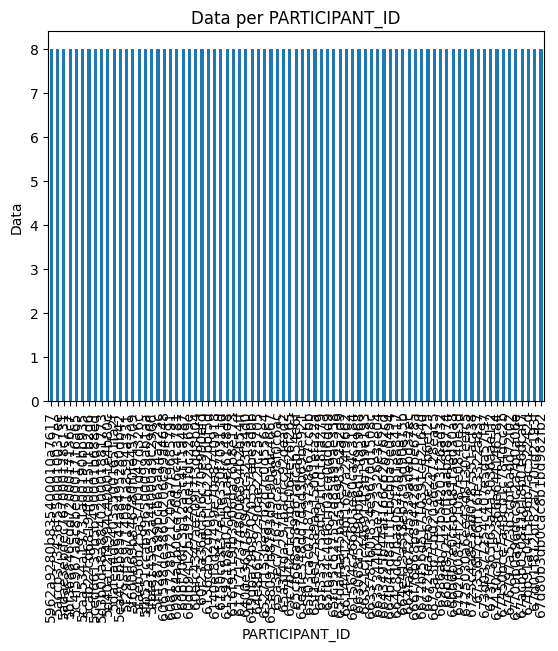

None
total time passed PARTICIPANT_ID (ms):
PARTICIPANT_ID
566bdeb3beaf21001240085a    11436794
57507e67fcaa630007cb9ad2      124106
5962a9280b835400010a7617     1000373
5abc0d68436f550001ff83ff       77148
5accb373436f5500010037ee     1848518
                              ...   
67acbb030811018b016dcaf7      406600
67bb91a04f5f96b7ac52242d     1772835
67d01f812bf82a710cd2193f     1480021
67d80b3db0cac8b1bd982fb2      404790
6870acd4d7a2c843c144bfd7     7504700
Length: 104, dtype: int64


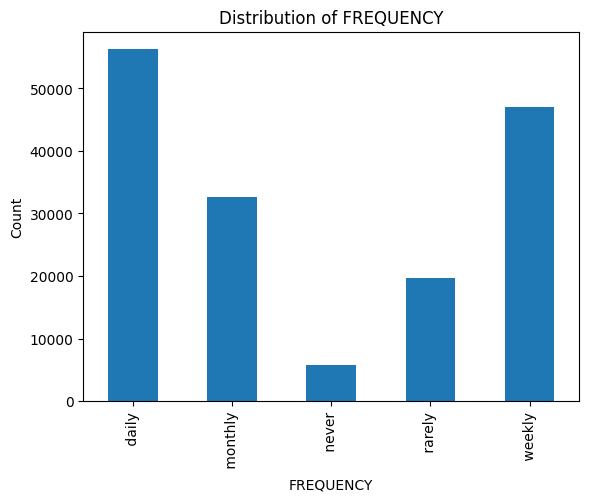

None
Length of PROMPT Columns per file:
SOURCE_FILE
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827082827.csv     59427
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091333.csv    143934
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091443.csv     36414
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091551.csv     30056
data/valid_keystrokes\experiment_566bdeb3beaf21001240085a_20250827091705.csv     53289
                                                                                 ...  
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074523.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074524.csv     10192
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074750.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074751.csv     18923
data/valid_keystrokes\experiment_6870acd4d7a2c843c144bfd7_20250827074752.csv  

In [10]:
print(unique_participant_ids(data_id_full))
print(print_pids(all_full_submission))
print(submissions_per_pid(data_id_full))

usage_times = data_id_cleaned.groupby('PARTICIPANT_ID').apply(usage_time, include_groups=False)
print("total time passed PARTICIPANT_ID (ms):")
print(usage_times)

print(show_frequency(data_id_cleaned))

prompt_lengths = data_id_cleaned.groupby('SOURCE_FILE').apply(prompt_length_per_file, include_groups=False)
print("Length of PROMPT Columns per file:")
print(prompt_lengths)

print(count_rows(all_full_submission))

print(calculate_time_per_file(all_full_submission))

In [11]:
from pathlib import Path
import pandas as pd

def _is_ascii_printable(ch: str) -> bool:
    o = ord(ch)
    return 0x20 <= o <= 0x7E  # space .. ~

def _is_cjk_like(ch: str) -> bool:
    o = ord(ch)
    # Unified ideographs + extensions
    return (
        (0x4E00 <= o <= 0x9FFF) or        # CJK Unified Ideographs
        (0x3400 <= o <= 0x4DBF) or        # CJK Extension A
        (0x20000 <= o <= 0x2A6DF) or      # CJK Extension B
        (0x2A700 <= o <= 0x2B73F) or      # CJK Extension C
        (0x2B740 <= o <= 0x2B81F) or      # CJK Extension D
        (0x2B820 <= o <= 0x2CEAF) or      # CJK Extension E
        (0x2CEB0 <= o <= 0x2EBEF) or      # CJK Extension F/G
        (0xF900 <= o <= 0xFAFF) or        # CJK Compatibility Ideographs
        (0x3040 <= o <= 0x309F) or        # Hiragana
        (0x30A0 <= o <= 0x30FF) or        # Katakana
        (0xFF65 <= o <= 0xFF9F) or        # Halfwidth Katakana
        (0xAC00 <= o <= 0xD7AF) or        # Hangul Syllables
        (0x1100 <= o <= 0x11FF)           # Hangul Jamo
    )

def _tally_token(token: str, process_markers=("process", "dead", "ime")):
    """
    Count characters within a single token/keystroke label.
    Returns (ascii_printable, cjk_like, other, process_flag)
    """
    if token is None:
        return 0, 0, 0, 0

    t = str(token).strip()
    # If the logger writes special events as words like 'Process', 'Dead', etc.
    if t.lower() in process_markers:
        return 0, 0, 0, 1

    ascii_cnt = sum(_is_ascii_printable(ch) for ch in t)
    cjk_cnt   = sum(_is_cjk_like(ch)       for ch in t)
    other_cnt = max(len(t) - ascii_cnt - cjk_cnt, 0)
    return ascii_cnt, cjk_cnt, other_cnt, 0

def detect_majority_regular_keys(
    folder,
    key_col="KEY",                 # change to your keystroke column name if different
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime"),
    per_file_mode=True,            # if True, only the mode key label per file counts once (less bias)
):
    """
    Scans all CSVs in `folder` and estimates, per participant and overall, whether
    keystrokes are mostly regular ASCII vs. CJK/IME composition ('Process/Dead/IME').

    Returns:
      {
        "overall": { "ascii_ratio": float, "cjk_ratio": float, "process_ratio": float, "classification": str },
        "participants": {
            "<participant_id>": {
                "ascii_ratio": float,
                "cjk_ratio": float,
                "process_ratio": float,
                "n_tokens": int,
                "classification": "regular" | "cjk_like" | "ime_process_heavy"
            },
            ...
        }
      }
    """
    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    # Per-participant tallies
    per_pid = {}

    # Helper to update tallies
    def _accumulate(pid, token):
        a, c, o, p = _tally_token(token, process_markers)
        rec = per_pid.setdefault(pid, {"ascii":0, "cjk":0, "other":0, "process":0, "n":0})
        rec["ascii"] += a
        rec["cjk"]   += c
        rec["other"] += o
        rec["process"] += p
        rec["n"]     += max(len(str(token)) if token is not None else 0, p)  # count chars or 1 for process

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"Error reading {f.name}: {e}")
            continue

        if participant_id_col not in df.columns:
            print(f"Skipping {f.name}: missing '{participant_id_col}'")
            continue
        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        # determine the file's participant id (expect single id; fallback to mode)
        pids = df[participant_id_col].dropna().astype(str).str.strip()
        pid = pids.mode().iloc[0] if not pids.empty else "__unknown__"

        keys = df[key_col].dropna().astype(str)

        if per_file_mode:
            # Use the most frequent key label in the file to avoid bias from very long texts
            token = keys.mode().iloc[0] if not keys.empty else None
            _accumulate(pid, token)
        else:
            for token in keys:
                _accumulate(pid, token)

    # Compute ratios and classifications
    def _ratios(rec):
        total_chars = rec["ascii"] + rec["cjk"] + rec["other"]
        total_events = total_chars + rec["process"]  # treat process as its own bucket
        if total_events == 0:
            return 0.0, 0.0, 0.0
        ascii_ratio   = rec["ascii"]   / total_events
        cjk_ratio     = rec["cjk"]     / total_events
        process_ratio = rec["process"] / total_events
        return ascii_ratio, cjk_ratio, process_ratio

    def _classify(ascii_ratio, cjk_ratio, process_ratio):
        # Simple, interpretable heuristics; tweak thresholds to your dataset.
        if process_ratio >= 0.30:
            return "ime_process_heavy"
        if cjk_ratio >= 0.30 and ascii_ratio < 0.60:
            return "cjk_like"
        return "regular"

    participants = {}
    overall_rec = {"ascii":0, "cjk":0, "other":0, "process":0, "n":0}

    for pid, rec in per_pid.items():
        a, c, p = _ratios(rec)
        participants[pid] = {
            "ascii_ratio": round(a, 3),
            "cjk_ratio": round(c, 3),
            "process_ratio": round(p, 3),
            "n_tokens": rec["n"],
            "classification": _classify(a, c, p)
        }
        for k in ("ascii","cjk","other","process","n"):
            overall_rec[k] += rec[k]

    oa, oc, op = _ratios(overall_rec)
    result = {
        "overall": {
            "ascii_ratio": round(oa, 3),
            "cjk_ratio": round(oc, 3),
            "process_ratio": round(op, 3),
            "classification": _classify(oa, oc, op)
        },
        "participants": participants
    }
    return result


In [12]:
stats = detect_majority_regular_keys("data/keystrokes", key_col="LETTER")  # change key_col if needed
print("Overall:", stats["overall"])

# Inspect a participant:
for pid, info in list(stats["participants"].items())[:5]:
    print(pid, info)


Overall: {'ascii_ratio': 0.998, 'cjk_ratio': 0.0, 'process_ratio': 0.002, 'classification': 'regular'}
566bdeb3beaf21001240085a {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 33, 'classification': 'regular'}
57507e67fcaa630007cb9ad2 {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 5, 'classification': 'regular'}
5962a9280b835400010a7617 {'ascii_ratio': 0.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 8, 'classification': 'regular'}
5abc0d68436f550001ff83ff {'ascii_ratio': 0.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 2, 'classification': 'regular'}
5accb373436f5500010037ee {'ascii_ratio': 1.0, 'cjk_ratio': 0.0, 'process_ratio': 0.0, 'n_tokens': 16, 'classification': 'regular'}


In [13]:
from pathlib import Path
import pandas as pd

def find_irregular_files_and_ids(
    folder,
    key_col="KEY",                 # change to your column name
    participant_id_col="PARTICIPANT_ID",
    file_pattern="*.csv",
    process_markers=("process", "dead", "ime", "composition"),
):
    """
    Scans all CSV files in `folder` and flags files that contain irregular key events:
      - Non-ASCII characters (not printable 0x20..0x7E)
      - CJK/Hangul/Hiragana/Katakana characters
      - Special tokens like 'Process', 'Dead', 'IME', 'Composition'

    Returns:
      {
        "irregular_files": { Path(...) : {"participant_ids": set([...]), "irregular_tokens": set([...])}, ... },
        "regular_files":   set([Path(...), ...]),
        "irregular_ids":   set([...])   # all participant IDs that ever had irregular input
      }
    """

    def _is_ascii_printable(ch: str) -> bool:
        return 0x20 <= ord(ch) <= 0x7E

    def _is_cjk_like(ch: str) -> bool:
        o = ord(ch)
        return (
            (0x4E00 <= o <= 0x9FFF) or (0x3400 <= o <= 0x4DBF) or
            (0x20000 <= o <= 0x2EBEF) or (0xF900 <= o <= 0xFAFF) or
            (0x3040 <= o <= 0x30FF) or (0xFF65 <= o <= 0xFF9F) or
            (0xAC00 <= o <= 0xD7AF) or (0x1100 <= o <= 0x11FF)
        )

    folder = Path(folder)
    files = sorted(p for p in folder.glob(file_pattern) if p.is_file())
    if not files:
        raise FileNotFoundError(f"No files matching {file_pattern} in {folder}")

    irregular_files = {}
    irregular_ids = set()
    regular_files = set()

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"Error reading {f}: {e}")
            continue

        if key_col not in df.columns:
            print(f"Skipping {f.name}: missing '{key_col}'")
            continue

        pids = set()
        if participant_id_col in df.columns:
            pids = set(df[participant_id_col].dropna().astype(str).str.strip())

        irregular_tokens = set()
        for token in df[key_col].dropna().astype(str):
            t = token.strip()
            if not t:
                continue
            if t.lower() in process_markers:
                irregular_tokens.add(t)
                continue
            for ch in t:
                if not _is_ascii_printable(ch):
                    irregular_tokens.add(ch)

        if irregular_tokens:
            irregular_files[f] = {
                "participant_ids": pids,
                "irregular_tokens": irregular_tokens,
            }
            irregular_ids.update(pids)
        else:
            regular_files.add(f)

    # Summary
    print(f"Checked {len(files)} files in {folder}")
    print(f"Regular files: {len(regular_files)}")
    print(f"Irregular files: {len(irregular_files)}")
    print(f"Irregular participant IDs: {len(irregular_ids)}")

    if irregular_files:
        print("\nExamples of irregular files:")
        for f, info in list(irregular_files.items())[:10]:
            print(f" - {f.name} (pids={list(info['participant_ids'])}): "
                  f"{list(info['irregular_tokens'])[:5]}...")

    return {
        "irregular_files": irregular_files,
        "regular_files": regular_files,
        "irregular_ids": irregular_ids,
    }


In [14]:
results = find_irregular_files_and_ids("data/full_submissions", key_col="LETTER")

# Get all irregular participant IDs
print("Irregular IDs:", results["irregular_ids"])

# Inspect irregular files
for f, info in results["irregular_files"].items():
    print(f.name, info["participant_ids"], info["irregular_tokens"])


Checked 632 files in data\full_submissions
Regular files: 610
Irregular files: 22
Irregular participant IDs: 13

Examples of irregular files:
 - experiment_606598de386cd206c99a4648_20250827100151.csv (pids=['606598de386cd206c99a4648']): ['τ', 'ι', 'ς', 'ρ']...
 - experiment_6081728972120aa7f9685791_20250819163340.csv (pids=['6081728972120aa7f9685791']): ['№']...
 - experiment_6081728972120aa7f9685791_20250819164901.csv (pids=['6081728972120aa7f9685791']): ['н', 'щ', 'ы', 'ш', 'ф']...
 - experiment_60f23a36acf5f6c70e990efd_20250826202528.csv (pids=['60f23a36acf5f6c70e990efd']): ['ç']...
 - experiment_61717173748006894b2b54ff_20250826175115.csv (pids=['61717173748006894b2b54ff']): ['í']...
 - experiment_61717173748006894b2b54ff_20250826175756.csv (pids=['61717173748006894b2b54ff']): ['ó']...
 - experiment_6538097b8793d9b90adc4667_20250827143620.csv (pids=['6538097b8793d9b90adc4667']): ['ó']...
 - experiment_6538097b8793d9b90adc4667_20250827144052.csv (pids=['6538097b8793d9b90adc4667']): 

In [15]:
from pathlib import Path
import pandas as pd

def list_files_with_nan(
    folder,
    pattern="*.csv",
    columns=None,            # e.g. ["KEY", "PARTICIPANT_ID"]; None = check all columns
    keep_default_na=True,    # True = pandas treats "", "NA", "NaN", etc. as NaN
    show_counts=False        # True = also print per-file counts
):
    """
    Print and return only the files that contain NaN values.

    Returns: list[Path] with files that have any NaN.
    """
    folder = Path(folder)
    hits = []

    for f in sorted(p for p in folder.glob(pattern) if p.is_file()):
        try:
            df = pd.read_csv(f, low_memory=False, keep_default_na=keep_default_na)
        except Exception as e:
            print(f"Skip {f.name}: {e}")
            continue

        scope = df if columns is None else df[columns]
        has_nan = scope.isna().any().any()
        if has_nan:
            hits.append(f)
            if show_counts:
                by_col = scope.isna().sum()
                n_rows = scope.isna().any(axis=1).sum()
                print(f"{f}  -> rows_with_NaN={n_rows}, by_column={{k:v for k,v in by_col.items() if v}}")
            else:
                print(f)

    print(f"\n{len(hits)} file(s) with NaN.")
    return hits


In [16]:
# Check all columns in all CSVs and print only files that contain NaN
list_files_with_nan("data/full_submissions", show_counts=True)


0 file(s) with NaN.


[]

### no files containing Nan values, no false Ids, no incomplete submissions

## find method to link keystrokes with marked text (confidendt, unconfident)

In [43]:
import os
import re
import difflib
from pathlib import Path
from typing import List, Dict, Optional, Tuple
import pandas as pd

# --- helpers ---------------------------------------------------------------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _normalize_key_token(tok: str) -> str:
    """
    Normalize raw key labels. Preserve literal space; map space-like labels to ' '; DO NOT confuse Backspace.
    """
    raw = str(tok)               # do NOT strip yet
    low_raw = raw.lower()

    # 1) Literal space character
    if raw == " ":
        return " "

    # 2) Space-like labels (guard against 'backspace')
    low_trim = low_raw.strip()
    if (("space" in low_trim and "backspace" not in low_trim)
        or low_trim in {"space", "spacebar", "key.space", "vk_space", "vk space", "key space"}):
        return " "

    # 3) Other aliases
    aliases = {
        "backspace": "Backspace",
        "delete": "Delete",
        "del": "Delete",
        "ctrl+a": "Ctrl+A",
        "ctrl + a": "Ctrl+A",
        "control+a": "Ctrl+A",
        "caps": "Cap",
        "shift": "Cap",
    }
    return aliases.get(low_trim, raw.strip())

def _is_printable_char(tok: str) -> bool:
    return isinstance(tok, str) and len(tok) == 1

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _find_key_column(df: pd.DataFrame) -> Optional[str]:
    if "LETTER" in df.columns:
        return "LETTER"
    if "KEY" in df.columns:
        return "KEY"
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

# --- produced -> prompt alignment -----------------------------------------

def _map_produced_to_prompt_indices(produced: str, prompt: str) -> Dict[int, int]:
    m = difflib.SequenceMatcher(a=produced, b=prompt, autojunk=False)
    mapping: Dict[int, int] = {}
    for tag, a0, a1, b0, b1 in m.get_opcodes():
        if tag == "equal":
            for off in range(a1 - a0):
                mapping[a0 + off] = b0 + off
        elif tag == "replace":
            alen, blen = (a1 - a0), (b1 - b0)
            if alen == 0:
                continue
            for off in range(alen):
                bi = b0 if blen == 0 else b0 + round(off * (blen / max(alen, 1)))
                bi = min(max(b0, bi), max(b0, b1 - 1)) if blen > 0 else b0
                mapping[a0 + off] = bi
        elif tag == "delete":
            fallback = max(0, b0 - 1) if len(prompt) else -1
            for off in range(a1 - a0):
                mapping[a0 + off] = fallback
        # 'insert' has no produced chars to map
    # fill gaps (keep None higher up instead of forcing to 0)
    last = None
    for i in range(len(produced)):
        if i not in mapping:
            mapping[i] = last
        else:
            last = mapping[i]
    return mapping

def _remap_keys_to_prompt_indices(
    key_to_prod_idx: Dict[int, Optional[int]],
    produced: str,
    prompt: str,
) -> Dict[int, Optional[int]]:
    """
    Map keystroke -> produced_index to keystroke -> prompt_index.
    Missing produced indices remain None; do NOT coerce to 0 here.
    """
    if not prompt:
        return {k: None for k in key_to_prod_idx}
    prod2prompt = _map_produced_to_prompt_indices(produced, prompt)
    L = len(prompt)
    out: Dict[int, Optional[int]] = {}
    for k, p in key_to_prod_idx.items():
        if p is None:
            out[k] = None
        else:
            q = prod2prompt.get(p, None)
            if q is None:
                out[k] = None
            else:
                # clamp safety (SequenceMatcher shouldn't produce <0 or >=L here)
                if q < 0: q = 0
                if q >= L: q = L - 1
                out[k] = q
    return out

# --- typing simulation -----------------------------------------------------

def _simulate_keys_to_produced_index(keys: List[str]) -> Tuple[Dict[int, Optional[int]], str, List[str]]:
    """
    Returns:
      key_to_prod_idx: dict[row_index] -> FINAL produced_char_index (or None before alignment)
      produced: final produced string
      norm_tokens: normalized token list

    Improvements:
    - Track which printable keys SURVIVE to the final buffer.
    - In the second pass, remap:
        * Backspace/Delete/Shift     -> NEXT surviving produced index
        * Printable that was ERASED  -> NEXT surviving produced index
      (exactly matches: h,a,i,Backspace,Backspace,i,g,h -> 50,51,51,51,51,51,52,53)
    """
    buf: List[str] = []
    produced_key_ids: List[int] = []      # which key created each current buf position
    deleted_producers: set[int] = set()   # printable keys popped/overwritten

    key_to_idx: Dict[int, Optional[int]] = {}
    cap_next = False
    cap_key_index: Optional[int] = None
    select_all = False

    norm_tokens = [_normalize_key_token(x) for x in keys]

    def push_char(ch: str, src_idx: int):
        nonlocal buf, select_all, cap_next, cap_key_index
        ch_out = ch.upper() if cap_next and ch.isalpha() else ch
        if select_all:
            # overwrite: everything that was in the buffer is deleted
            deleted_producers.update(produced_key_ids)
            buf = [ch_out]
            produced_key_ids[:] = [src_idx]
        else:
            buf.append(ch_out)
            produced_key_ids.append(src_idx)

        mapped_idx = len(buf) - 1
        key_to_idx[src_idx] = mapped_idx

        # Map the preceding Shift/Cap to the same produced index
        if cap_next and cap_key_index is not None:
            key_to_idx[cap_key_index] = mapped_idx

        cap_next = False
        cap_key_index = None
        select_all = False

    def do_backspace(src_idx: int):
        nonlocal buf
        if select_all:
            # clear all
            deleted_producers.update(produced_key_ids)
            buf = []
            produced_key_ids.clear()
            key_to_idx[src_idx] = None
            return
        if buf:
            buf.pop()
            # the popped printable key is deleted
            deleted_key = produced_key_ids.pop()
            deleted_producers.add(deleted_key)
            # provisional cursor pos (we'll remap later)
            key_to_idx[src_idx] = len(buf)

    def do_delete(src_idx: int):
        do_backspace(src_idx)

    # --- first pass: build buffer, record raw mappings & producers -----------
    for i, tok in enumerate(norm_tokens):
        if tok in ("Cap", "Shift"):
            cap_next = True
            cap_key_index = i
            key_to_idx[i] = None
            continue
        if tok in ("Ctrl+a", "Ctrl+A"):
            select_all = True
            key_to_idx[i] = None
            continue
        if tok == "Backspace":
            do_backspace(i)
            continue
        if tok == "Delete":
            do_delete(i)
            continue
        if _is_printable_char(tok):
            push_char(tok, i)
        else:
            key_to_idx[i] = None

    produced = "".join(buf)
    prod_len = len(produced)

    # Final survivors: map printable key -> its FINAL produced index
    final_pos_by_key: Dict[int, int] = {kid: idx for idx, kid in enumerate(produced_key_ids)}

    # --- second pass: for every key, point to NEXT surviving produced index ---
    next_surviving_prod_idx: List[Optional[int]] = [None] * len(norm_tokens)
    next_seen: Optional[int] = None
    # scan right-to-left; remember the next produced index of a surviving printable
    for i in range(len(norm_tokens) - 1, -1, -1):
        # if this key *survives*, it defines a "next seen"
        if i in final_pos_by_key:
            next_seen = final_pos_by_key[i]
        next_surviving_prod_idx[i] = next_seen

    # Repoint rules:
    for i, tok in enumerate(norm_tokens):
        v = key_to_idx.get(i)

        # All Backspace/Delete/Shift should follow the next surviving printable
        if tok in ("Backspace", "Delete", "Cap", "Shift"):
            key_to_idx[i] = next_surviving_prod_idx[i]
            continue

        # Printable:
        if _is_printable_char(tok):
            # If this printable didn't survive (deleted or overwritten), follow the next survivor
            if i not in final_pos_by_key:
                key_to_idx[i] = next_surviving_prod_idx[i]
            else:
                # keep its own final position
                key_to_idx[i] = final_pos_by_key[i]
        # else: leave None

    return key_to_idx, produced, norm_tokens


# --- main ------------------------------------------------------------------

def create_prompt_char(path: str | os.PathLike):
    """
    Creates data/linked_charAt/ with same CSVs extended by PROMPT_CHAR.
    - Every Shift maps to the same index as the next surviving printable.
    - Backspace/Delete map to the NEXT valid position (next surviving printable).
    - Printables typed then erased inherit the next surviving printable’s index.
    - If no later printable exists (trailing edits), keys map to the LAST prompt index.
    - Spaces are printable and advance naturally.
    - Unmappable keys -> -1.
    """
    path = Path(path)
    out_dir = Path("data") / "linked_charAt"
    os.makedirs(out_dir, exist_ok=True)

    csvs = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not csvs:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in csvs:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        key_col = _find_key_column(df)
        if not key_col:
            print(f"[skip] {f.name}: missing 'LETTER' or 'KEY' column")
            continue

        prompt = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt)
        L = len(prompt)

        keys = df[key_col].astype(str).tolist()
        key_to_prod_idx, produced, norm_tokens = _simulate_keys_to_produced_index(keys)

        # Align produced -> prompt
        key_to_prompt_idx = _remap_keys_to_prompt_indices(key_to_prod_idx, produced, prompt)

        # Final safety: if there's NO later printable, push these to LAST prompt index
        if L > 0:
            for i, tok in enumerate(norm_tokens):
                if key_to_prompt_idx.get(i) is None and (
                    tok in ("Backspace", "Delete", "Cap", "Shift") or _is_printable_char(tok)
                ):
                    key_to_prompt_idx[i] = L - 1

        # Emit PROMPT_CHAR
        n = len(df)
        max_key = max(key_to_prompt_idx.keys()) if key_to_prompt_idx else -1
        out = []
        for i in range(n):
            if i <= max_key:
                v = key_to_prompt_idx.get(i, None)
                out.append(int(v) if v is not None else -1)
            else:
                out.append(-1)

        df["PROMPT_CHAR"] = pd.Series(out, dtype="int64")

        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with PROMPT_CHAR written to: {out_dir.resolve()}")


In [44]:
create_prompt_char("data/full_submissions")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819171658.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819171842.csv
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172140.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172308.csv
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172535.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172701.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv -> data\linked_charAt\experiment_5962a9280b835400010a7617_20250819172849.csv
[ok] experiment_5962a9280b835400010a7617_

### indexes to corresponding prompt characters created
-> check for ctrl+a+Backspace behaviour

In [37]:
from pathlib import Path
import pandas as pd

def _find_key_col(df):
    if "LETTER" in df.columns: return "LETTER"
    if "KEY" in df.columns:    return "KEY"
    # case-insensitive fallback
    lowers = {c.lower(): c for c in df.columns}
    return lowers.get("letter") or lowers.get("key")

def _norm(tok: str) -> str:
    s = str(tok).strip()
    low = s.lower()
    # normalize common variants
    if low in {"ctrl", "control", "lctrl", "rctrl", "leftctrl", "rightctrl", "ctrl_l", "ctrl_r"}:
        return "ctrl"
    if low in {"backspace", "bksp", "bspace"}:
        return "backspace"
    # normalize chord forms like "ctrl + a", "Ctrl+A"
    low = low.replace(" ", "")
    if low in {"ctrl+a", "control+a"}:
        return "ctrl+a"
    return s.lower()  # letters like 'a', 'b', ' ' (space) etc.

def find_ctrl_a_backspace_sequences(folder, pattern="*.csv", max_print_hits=10):
    """
    Look for suspicious consecutive patterns that can break indexing:
      1) 'ctrl', 'a', 'backspace'  (three consecutive rows)
      2) 'ctrl+a', 'backspace'     (two consecutive rows when chord is logged as one token)

    Prints the file names and row indices where the pattern occurs.
    Returns: dict[Path, {"triple": [(i,i+1,i+2), ...], "chord": [(i,i+1), ...]}]
    """
    folder = Path(folder)
    results = {}
    files = sorted(p for p in folder.glob(pattern) if p.is_file())

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        col = _find_key_col(df)
        if not col:
            # no keystroke column
            continue

        toks = [_norm(x) for x in df[col].astype(str).tolist()]

        triple_hits = []
        chord_hits  = []

        # three-row pattern: ctrl, a, backspace
        for i in range(len(toks) - 2):
            if toks[i] == "ctrl" and toks[i+1] == "a" and toks[i+2] == "backspace":
                triple_hits.append((i, i+1, i+2))

        # two-row pattern: ctrl+a, backspace
        for i in range(len(toks) - 1):
            if toks[i] == "ctrl+a" and toks[i+1] == "backspace":
                chord_hits.append((i, i+1))

        if triple_hits or chord_hits:
            results[f] = {"triple": triple_hits, "chord": chord_hits}

    # ---- report
    if not results:
        print("No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.")
        return {}

    print("Found files with potential Ctrl+A→Backspace sequences:")
    for f, hits in results.items():
        print(f" - {f.name}")
        # show a few example indices
        if hits["triple"]:
            show = hits["triple"][:max_print_hits]
            print(f"    triple (ctrl, a, backspace): {show}" + (" ..." if len(hits['triple']) > len(show) else ""))
        if hits["chord"]:
            show = hits["chord"][:max_print_hits]
            print(f"    chord  (Ctrl+A, backspace): {show}" + (" ..." if len(hits['chord']) > len(show) else ""))

    return results


In [38]:
# Scan the folder you processed (e.g., data/linked_charAt or your raw folder)
find_ctrl_a_backspace_sequences("data/full_submissions")

# If your CSVs use KEY instead of LETTER, it’s handled automatically.
# You can also scan the already-extended files:
find_ctrl_a_backspace_sequences("data/linked_charAt")


No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.
No files contain consecutive 'ctrl, a, backspace' (or 'Ctrl+A', 'Backspace') patterns.


{}

## Now generate files that link CONFIDENT and UNCONFIDENT to PROMPT_CHAR indexes

In [39]:
from pathlib import Path
import re
import pandas as pd
import os
from typing import List, Tuple, Optional, Set

# -------- helpers --------

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str) -> Optional[str]:
    if colname not in df.columns:
        return None
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else None

def _parse_spans(val) -> List[Tuple[int, int]]:
    """
    Accepts formats like: [4,84], (4,84), 4,84, 4-84, 4;84, and multiples separated by ';' or '|'
    Returns inclusive pairs [(start, end), ...].
    Single numbers become (n, n).
    """
    if val is None:
        return []
    s = str(val).strip()
    if not s or s.lower() == "nan":
        return []
    spans = []
    # split multiple spans
    for part in re.split(r"[;|]", s):
        nums = [int(x) for x in re.findall(r"-?\d+", part)]
        if len(nums) >= 2:
            a, b = nums[0], nums[1]
            if a > b:
                a, b = b, a
            spans.append((a, b))
        elif len(nums) == 1:
            n = nums[0]
            spans.append((n, n))
    return spans

def _clamp_spans(spans: List[Tuple[int, int]], max_index: int) -> List[Tuple[int, int]]:
    """
    Clamp inclusive spans to [0, max_index]. Drop spans entirely outside.
    (Handles your 'end might be +1 at very end' case by clamping to max_index.)
    """
    if max_index < 0:
        return []
    out = []
    for a, b in spans:
        a2 = max(0, a)
        b2 = min(max_index, b)
        if a2 <= b2:
            out.append((a2, b2))
    return out

def _span_to_index_set(spans: List[Tuple[int, int]]) -> Set[int]:
    idx: Set[int] = set()
    for a, b in spans:
        idx.update(range(a, b + 1))
    return idx

# -------- main --------

def create_concrete_chars(path: str | os.PathLike):
    """
    Reads all CSVs in `path` and writes them to data/concrete_chars/ with:
      - CONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any CONFIDENT span
      - UNCONFIDENT_MARKED_CHAR (0/1): 1 if PROMPT_CHAR in any UNCONFIDENT span

    Notes:
    - PROMPT_CHAR is expected to be 0-based index per row; rows with PROMPT_CHAR == -1 get 0.
    - CONFIDENT/UNCONFIDENT may contain multiple span ranges like "[4,84];[95,105]".
    - Span ends are clamped to len(PROMPT)-1 to tolerate a +1 overrun at the very end.
    """
    path = Path(path)
    out_dir = Path("data") / "concrete_chars"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # PROMPT length (for clamping)
        prompt_val = _pick_mode_nonempty(df, "PROMPT") or ""
        prompt = _norm_text(prompt_val)
        max_idx = len(prompt) - 1  # can be -1 if empty

        # PROMPT_CHAR column must exist
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue
        # Coerce PROMPT_CHAR to numeric (keep -1 for invalids)
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        # Parse and clamp CONFIDENT spans
        conf_raw = _pick_mode_nonempty(df, "CONFIDENT")
        conf_spans = _parse_spans(conf_raw)
        conf_spans = _clamp_spans(conf_spans, max_idx)
        conf_idx = _span_to_index_set(conf_spans)

        # Parse and clamp UNCONFIDENT spans
        unconf_raw = _pick_mode_nonempty(df, "UNCONFIDENT")
        unconf_spans = _parse_spans(unconf_raw)
        unconf_spans = _clamp_spans(unconf_spans, max_idx)
        unconf_idx = _span_to_index_set(unconf_spans)

        # Build 0/1 columns
        if conf_idx:
            df["CONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in conf_idx) else 0).astype("int64")
        else:
            df["CONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        if unconf_idx:
            df["UNCONFIDENT_MARKED_CHAR"] = pc.apply(lambda x: 1 if (x >= 0 and x in unconf_idx) else 0).astype("int64")
        else:
            df["UNCONFIDENT_MARKED_CHAR"] = pd.Series([0]*len(df), dtype="int64")

        # Write out
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Extended files are in: {out_dir.resolve()}")


In [40]:
create_concrete_chars("data/linked_charAt")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819171658.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819171842.csv
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172140.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172308.csv
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172535.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172701.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv -> data\concrete_chars\experiment_5962a9280b835400010a7617_20250819172849.csv
[ok] experiment_5962a9280b83540001

## Now generate words to later link to words that have been markes or WPM, Error rate etc.

In [41]:
from pathlib import Path
import pandas as pd
import os

def _norm_text(s: str) -> str:
    return (
        str(s)
        .replace("\r\n", "\n")
        .replace("\r", "\n")
        .replace("\u00A0", " ")
    )

def _pick_mode_nonempty(df: pd.DataFrame, colname: str):
    if colname not in df.columns:
        return ""
    s = df[colname].astype(str)
    s = s[s.str.strip().ne("") & s.str.lower().ne("nan")]
    return s.mode().iloc[0] if not s.empty else ""

def create_words(path: str | os.PathLike):
    """
    Read all CSVs in `path` and write them to ./data/words/ with a new column:
      - WORD (0/1): 1 if the row's PROMPT_CHAR points to a non-space character in PROMPT; else 0.

    Notes:
    - Punctuation and digits are counted as words (1).
    - True spaces are 0.
    - Rows with PROMPT_CHAR == -1 (unmapped) are 0.
    """
    path = Path(path)
    out_dir = Path("data") / "words"
    os.makedirs(out_dir, exist_ok=True)

    files = sorted(p for p in path.glob("*.csv") if p.is_file())
    if not files:
        raise FileNotFoundError(f"No CSV files found in: {path}")

    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except Exception as e:
            print(f"[skip] {f.name}: {e}")
            continue

        # Need PROMPT_CHAR
        if "PROMPT_CHAR" not in df.columns:
            print(f"[skip] {f.name}: missing PROMPT_CHAR column")
            continue

        # Get PROMPT (mode non-empty), normalize
        prompt = _norm_text(_pick_mode_nonempty(df, "PROMPT"))
        L = len(prompt)

        # Precompute mask over prompt: 1 for non-space, 0 for space
        if L > 0:
            char_is_word = [0 if prompt[i] == " " else 1 for i in range(L)]
        else:
            char_is_word = []

        # Build WORD column
        pc = pd.to_numeric(df["PROMPT_CHAR"], errors="coerce").fillna(-1).astype("int64")

        def _row_word(ix: int) -> int:
            if ix < 0 or ix >= L:
                return 0
            return char_is_word[ix]

        df["WORD"] = pc.apply(_row_word).astype("int64")

        # Save
        out_path = out_dir / f.name
        df.to_csv(out_path, index=False, encoding="utf-8")
        print(f"[ok] {f.name} -> {out_path}")

    print(f"\nDone. Files with WORD written to: {out_dir.resolve()}")


In [42]:
create_words("data/concrete_chars")

[ok] experiment_5962a9280b835400010a7617_20250819171658.csv -> data\words\experiment_5962a9280b835400010a7617_20250819171658.csv
[ok] experiment_5962a9280b835400010a7617_20250819171842.csv -> data\words\experiment_5962a9280b835400010a7617_20250819171842.csv
[ok] experiment_5962a9280b835400010a7617_20250819172140.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172140.csv
[ok] experiment_5962a9280b835400010a7617_20250819172308.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172308.csv
[ok] experiment_5962a9280b835400010a7617_20250819172535.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172535.csv
[ok] experiment_5962a9280b835400010a7617_20250819172701.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172701.csv
[ok] experiment_5962a9280b835400010a7617_20250819172849.csv -> data\words\experiment_5962a9280b835400010a7617_20250819172849.csv
[ok] experiment_5962a9280b835400010a7617_20250819173056.csv -> data\words\experiment_5962a9280b83

In [20]:
# # Correlation
#
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# numeric_merged = merged.select_dtypes(include='number')
#
# corr_matrix = numeric_merged.corr()
#
# print(corr_matrix)
#
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Korrelationsmatrix')
# plt.show()